In [2]:
import seaborn as sns
import  pandas as pd
import pymysql
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

In [3]:
host = "localhost"
port = 3306
user = "root"
db = "data"
password = "123456"
charset = "utf8"

conn = pymysql.connect(host=host,port=port,user=user,password=password,charset=charset,db=db)
sql = 'select * from alldata_a'
df = pd.read_sql(sql, conn)
df

C:\Users\yhy\AppData\Local\Temp\ipykernel_9628\2815650000.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Li, H",None,None,None,"Li, H.",None,None,撤稿声明: 被撤回的出版物: Thermal Fault Detection and Dia...,ADVANCES IN MULTIMEDIA,...,1,"Engineering, Electrical & Electronic",Emerging Sources Citation Index (ESCI),Engineering,Q4FE0,None,gold,2024/1/4,WOS:001057083800037,0
1,J,"Yan, LP; Sun, Q; Liu, ZB; Wu, M; Ge, YP; Zhang, Q",None,None,None,"Yan, Li-Ping; Sun, Qin; Liu, Zhi-Bin; Wu, Min;...",None,None,撤稿声明: 被撤回的出版物: A new porous Co (II)-coordinati...,APPLIED ORGANOMETALLIC CHEMISTRY,...,1,"Chemistry, Applied; Chemistry, Inorganic & Nuc...",Science Citation Index Expanded (SCI-EXPANDED),Chemistry,C7JI3,None,Bronze,2024/1/4,WOS:000963633400001,0
2,J,"Charles, OK",None,None,None,"Charles, Omotayo K. K.",None,None,被撤回的出版物: Interrogating the traditional ethics ...,JOURNAL OF CULTURAL ECONOMY,...,15,Cultural Studies; Economics; Sociology,Social Science Citation Index (SSCI); Arts & H...,Cultural Studies; Business & Economics; Sociology,7Y5CR,None,None,2024/1/4,WOS:000914897700001,0
3,J,"Chen, Z; Zhang, Y; Wu, J; Gao, X; Huang, C; Li...",None,None,None,"Chen, Z.; Zhang, Y.; Wu, J.; Gao, X.; Huang, C...",None,None,撤稿声明: 被撤回的出版物: Effect of Doxofylline on Reduci...,INTERNATIONAL JOURNAL OF CHRONIC OBSTRUCTIVE P...,...,1,Respiratory System,Science Citation Index Expanded (SCI-EXPANDED),Respiratory System,I6KF9,None,"gold, Green Published",2024/1/4,WOS:001003847100001,0
4,J,"Fan, JJ",None,None,None,"Fan, Jiongjiong",None,None,被撤回的出版物: Theory and method for evaluating the ...,JOURNAL OF INTELLIGENT & FUZZY SYSTEMS,...,27,"Computer Science, Artificial Intelligence",Science Citation Index Expanded (SCI-EXPANDED),Computer Science,D3CJ1,None,None,2024/1/4,WOS:000967533700027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13074,J,"Tang, JN; Huang, M; Yang, ML; Zhao, YY; Ouyang...",None,None,None,"Tang, Jiannan; Huang, Mei; Yang, Mengling; Zha...",None,None,被撤回的出版物: A procedure for solving transient non...,APPLIED THERMAL ENGINEERING,...,11,"Thermodynamics; Energy & Fuels; Engineering, M...",Science Citation Index Expanded (SCI-EXPANDED),Thermodynamics; Energy & Fuels; Engineering; M...,GM3LP,None,None,2024/1/4,WOS:000438006400044,0
13075,J,"Wen, X; Han, XR; Wang, YJ; Wang, S; Shen, M; Z...",None,None,None,"Wen, Xin; Han, Xin-Rui; Wang, Yong-Jian; Wang,...",None,None,被撤回的出版物: Down-regulated long non-coding RNA AN...,JOURNAL OF CELLULAR BIOCHEMISTRY,...,13,Biochemistry & Molecular Biology; Cell Biology,Science Citation Index Expanded (SCI-EXPANDED),Biochemistry & Molecular Biology; Cell Biology,GI1JU,29600544,Bronze,2024/1/4,WOS:000434127400072,0
13076,J,"Jiang, XF; Huang, XY; Jiang, TM; Zheng, L; Zha...",None,None,None,"Jiang, Xianfang; Huang, Xianyuan; Jiang, Tongm...",None,None,被撤回的出版物: The role of Sox9 in collagen hydrogel...,BIOMATERIALS SCIENCE,...,13,"Materials Science, Biomaterials",Science Citation Index Expanded (SCI-EXPANDED),Materials Science,GH7DS,29696285,None,2024/1/4,WOS:000433604100024,0
13077,J,"Li, YJ; Chen, H; She, PF; Chen, T; Chen, LH; Y...",None,None,None,"Li, Yingjia; Chen, Hui; She, Pengfei; Chen, Ti...",None,None,被撤回的出版物: microRNA-23a promotes cell growth and...,ONCOLOGY LETTERS,...,9,Oncology,Science Citation Index Expanded (SCI-EXPANDED),Oncology,GJ3BK,29805579,"Green Submitted, Green Published, gold",2024/1/4,WOS:000435149700032,0


In [6]:
pd.value_counts(df['Publication Type'])

J    11064
C     2008
S        4
B        3
Name: Publication Type, dtype: int64

撤稿文献语言分布统计

In [7]:
#全部语言种类
pd.value_counts('Language')

Language    8
dtype: int64

In [8]:
#各语言数量
pd.value_counts(df['Language'])

English        13023
Chinese           29
French            10
German             8
Russian            5
Korean             2
Unspecified        1
Turkish            1
Name: Language, dtype: int64

撤稿文献出版商分布统计

In [9]:
Publisher_count = pd.value_counts(df['Publisher'])
Publisher_count

ELSEVIER SCIENCE BV                            938
WILEY                                          842
SPRINGER                                       826
IEEE                                           809
ELSEVIER                                       514
                                              ... 
GUILFORD PUBLICATIONS INC                        1
HELDERMANN VERLAG                                1
ASSOC CHEMICAL ENG                               1
CHINESE CENTER DISEASE CONTROL & PREVENTION      1
ASSOC APOIO PESQUISA & SAUDE BUCAL-APESB         1
Name: Publisher, Length: 492, dtype: int64

C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\2143688809.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  my_plot = sns.barplot(x=y,y=x,palette='Blues_d',legend=False)
C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\2143688809.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(),rotation=90)


[Text(0.0, 0, '0'),
 Text(200.0, 0, '200'),
 Text(400.0, 0, '400'),
 Text(600.0, 0, '600'),
 Text(800.0, 0, '800'),
 Text(1000.0, 0, '1000')]

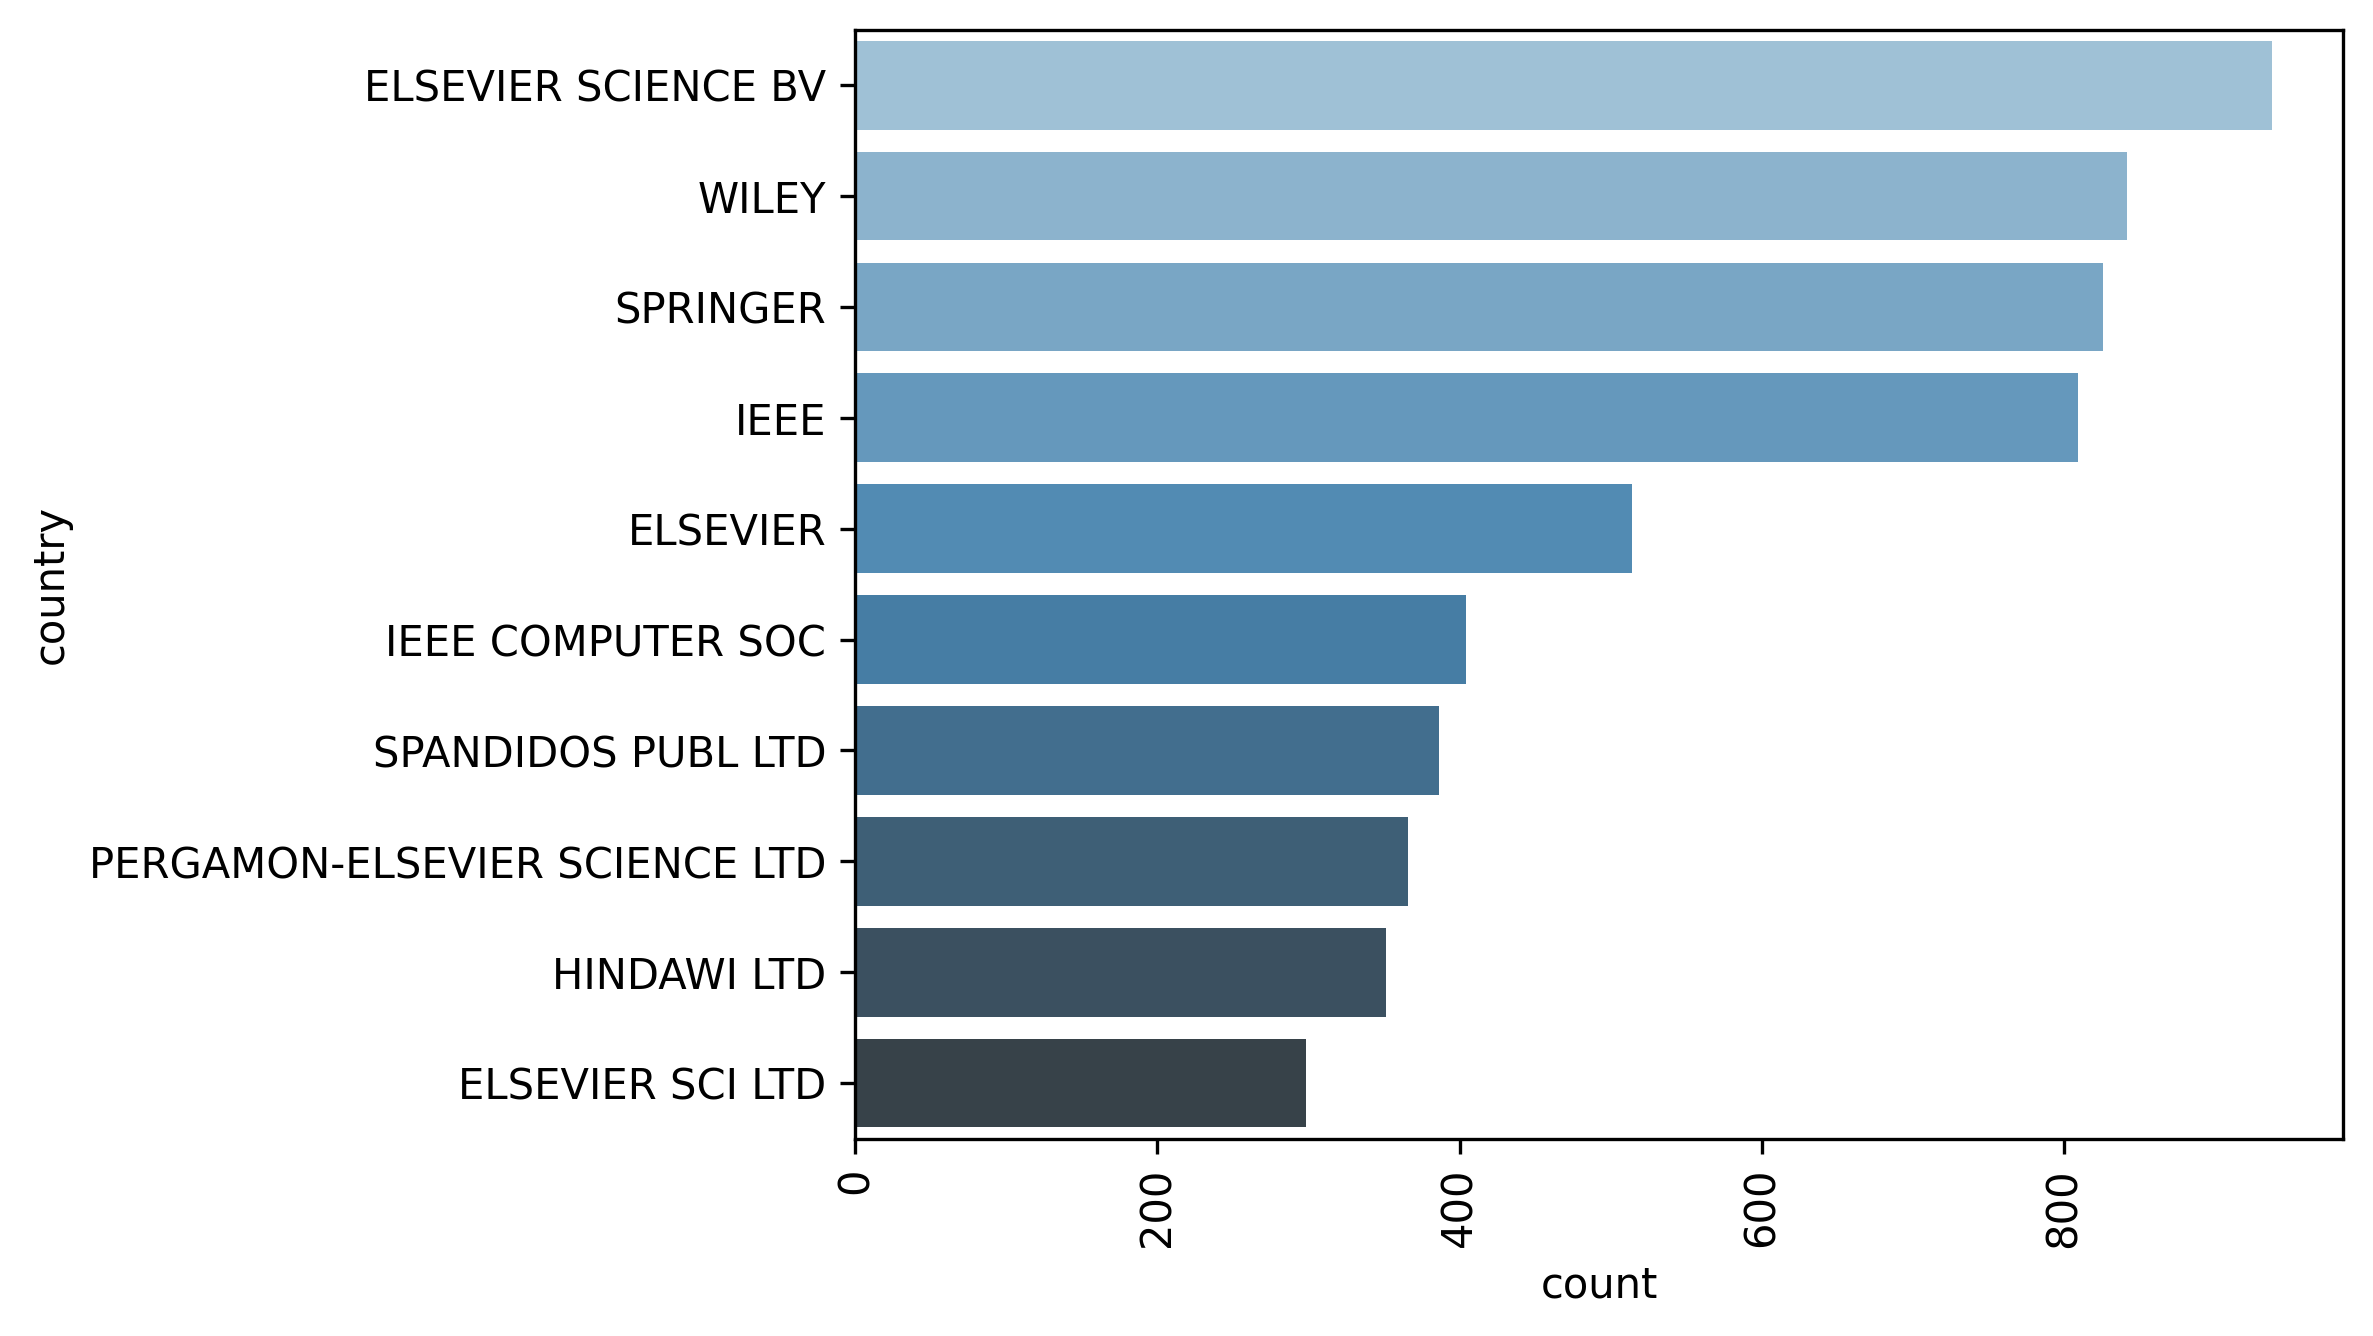

In [10]:
#出版商前十分布
data = list(pd.value_counts(df['Publisher']))
y = data[:10]
index_name = list(pd.value_counts(df['Publisher']).index)
x = index_name[:10]

plt.figure(dpi=300)
my_plot = sns.barplot(x=y,y=x,palette='Blues_d',legend=False)
plt.xlabel('count')
plt.ylabel('country')
my_plot.set_xticklabels(my_plot.get_xticklabels(),rotation=90)

撤稿文献出版城市统计

In [11]:
pd.value_counts(df['Publisher City'])

NEW YORK       1783
AMSTERDAM      1497
LONDON         1430
HOBOKEN         870
OXFORD          812
               ... 
DELHI             1
OMSK              1
PRISHTINE         1
ST PAUL           1
JOAO PESSOA       1
Name: Publisher City, Length: 259, dtype: int64

C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\3170267610.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  my_plot = sns.barplot(x=x1,y=y1,palette="plasma_r", ci=95,
C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\3170267610.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  my_plot = sns.barplot(x=x1,y=y1,palette="plasma_r", ci=95,
C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\3170267610.py:8: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'yellow'}` instead.

  my_plot = sns.barplot(x=x1,y=y1,palette="plasma_r", ci=95,
C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\3170267610.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  my_plot 

[Text(0, 0, 'NEW YORK'),
 Text(1, 0, 'AMSTERDAM'),
 Text(2, 0, 'LONDON'),
 Text(3, 0, 'HOBOKEN'),
 Text(4, 0, 'OXFORD'),
 Text(5, 0, 'PHILADELPHIA'),
 Text(6, 0, 'WASHINGTON'),
 Text(7, 0, 'CAMBRIDGE'),
 Text(8, 0, 'LOS ALAMITOS'),
 Text(9, 0, 'ATHENS')]

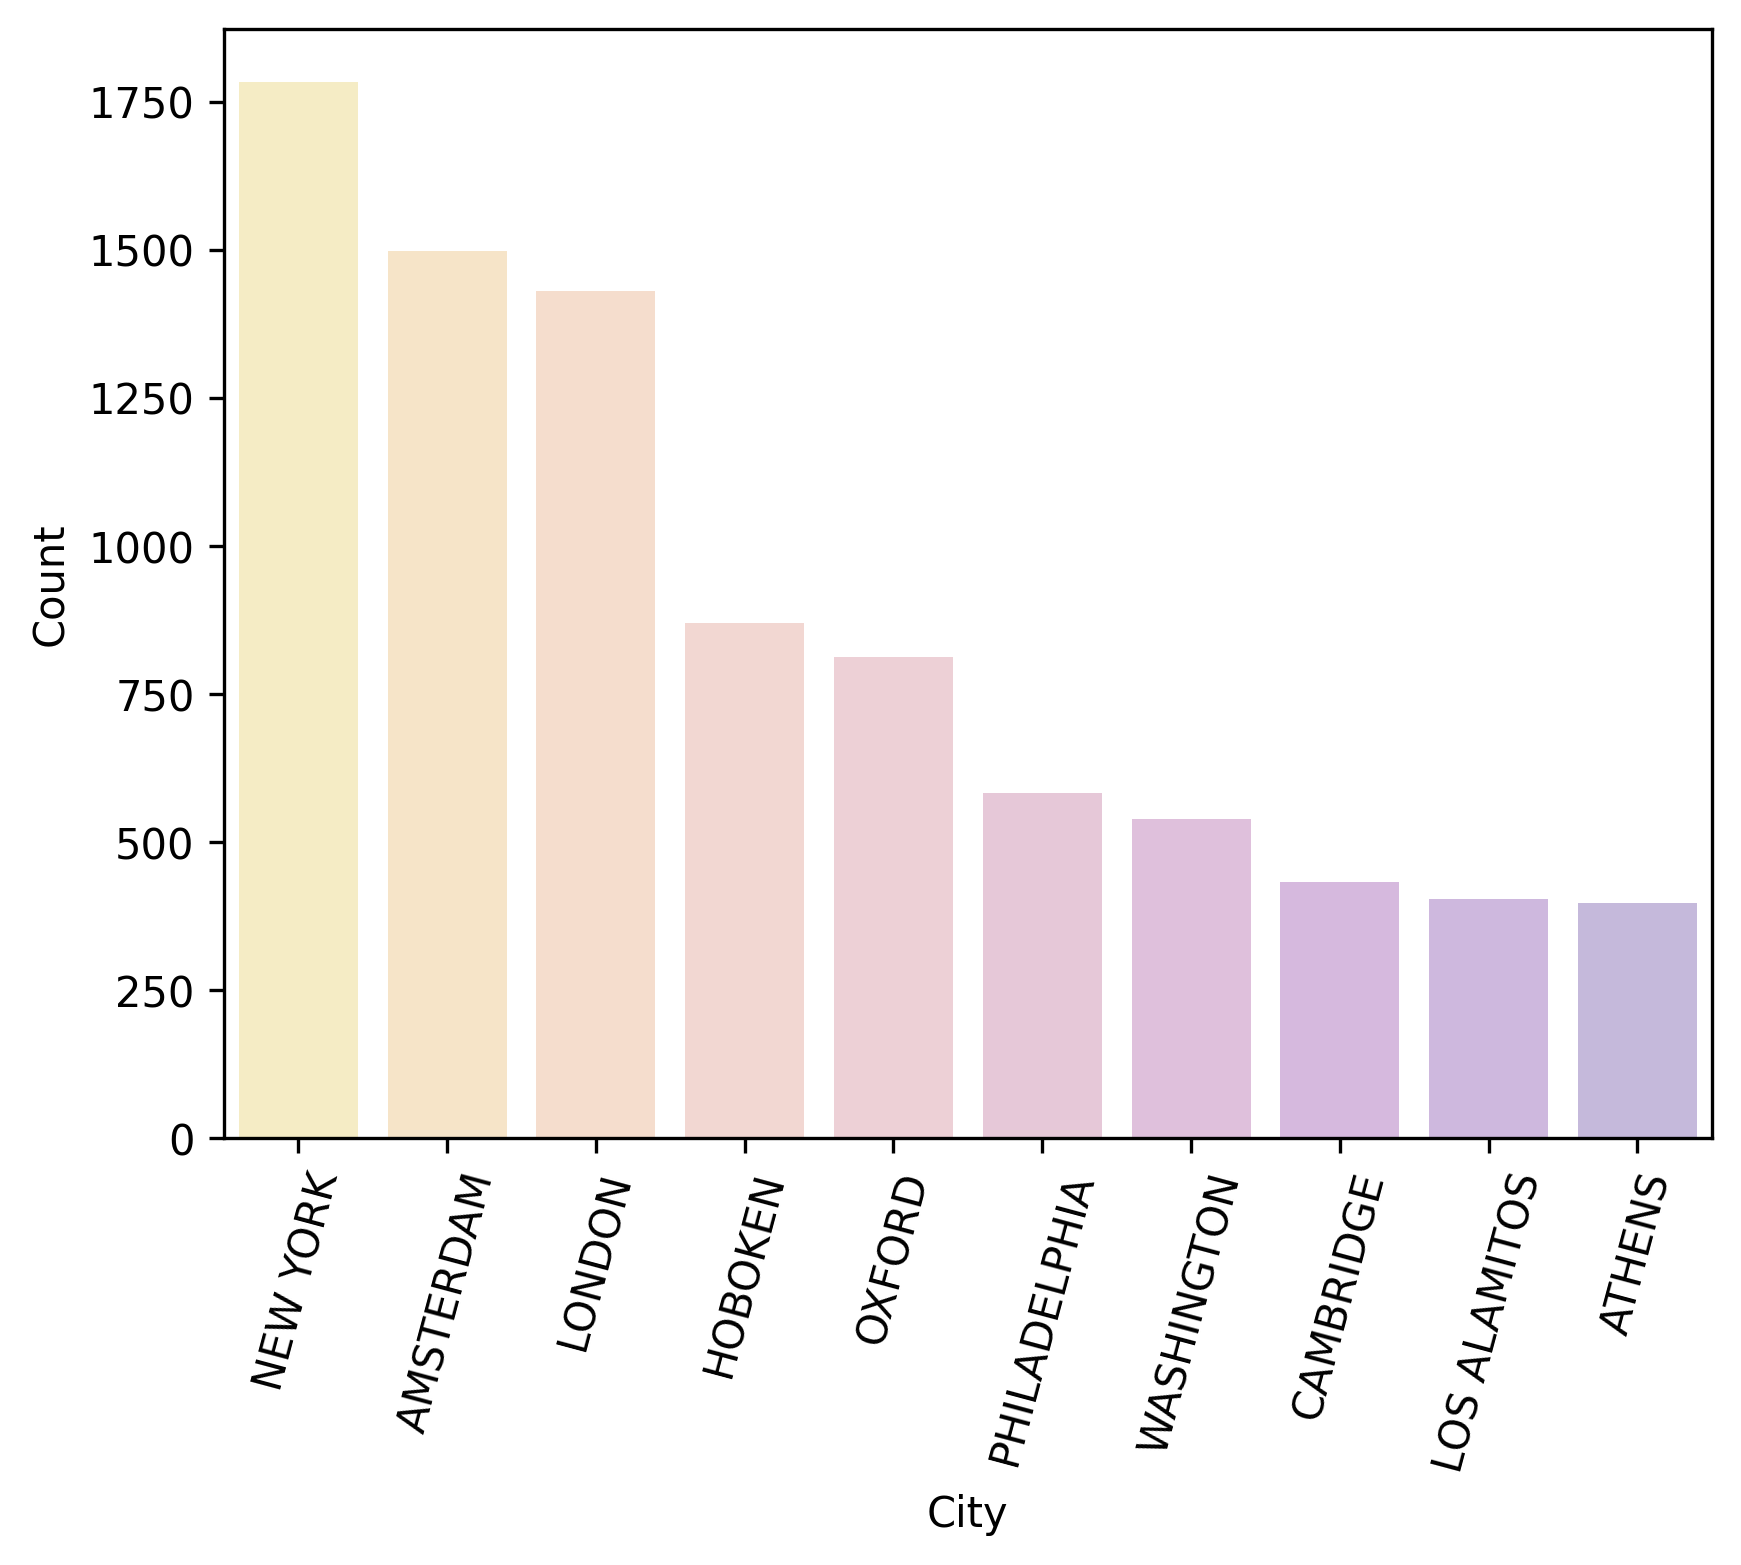

In [12]:
#出版城市前十分布
data_1 = list(pd.value_counts(df['Publisher City']))
y1 = data_1[:10]
index_name1 = list(pd.value_counts(df['Publisher City']).index)
x1 = index_name1[:10]

plt.figure(dpi=300)
my_plot = sns.barplot(x=x1,y=y1,palette="plasma_r", ci=95,
           errcolor='yellow', errwidth=2, alpha=0.3)
plt.xlabel('City')
plt.ylabel('Count')
my_plot.set_xticklabels(my_plot.get_xticklabels(),rotation=75)

撤稿文献出版商和出版城市统计

In [13]:
df_1 = pd.DataFrame(df.groupby(['Publisher','Publisher City']).size())
df_1

,,0
Publisher,Publisher City,
A V S AMER INST PHYSICS,MELVILLE,1
ACAD MANAGEMENT,BRIARCLIFF MANOR,1
"ACAD SCIENCES CZECH REPUBLIC, INST EXPERIMENTAL BOTANY",PRAHA 6,1
ACADEMIC PRESS INC ELSEVIER SCIENCE,SAN DIEGO,161
ACADEMIC PRESS LTD- ELSEVIER SCIENCE LTD,LONDON,58
...,...,...
ZAMENSALAMATI PUBL CO,MASHHAD,12
ZHEJIANG UNIV PRESS,Hangzhou,2
ZHEJIANG UNIV SCH MEDICINE,HANGZHOU,2


撤稿文献出版年份统计

In [14]:
Year_count = pd.value_counts(df['Publication Year'])
Year_count

2011    1182
2019     947
2010     890
2020     872
2021     839
2018     828
2009     771
2015     687
2017     658
2022     634
2016     608
2014     599
2012     502
2013     492
2007     437
2008     422
2006     316
2005     228
2023     202
2004     197
2003     148
2002     116
2001     116
2000      92
1999      50
1998      42
1997      39
1995      28
1994      24
1996      24
1991      18
1993      17
1992      14
1990      12
1989       6
1988       4
1987       4
1986       3
1978       2
1983       2
1981       1
1951       1
1982       1
1980       1
1974       1
1985       1
1975       1
Name: Publication Year, dtype: int64

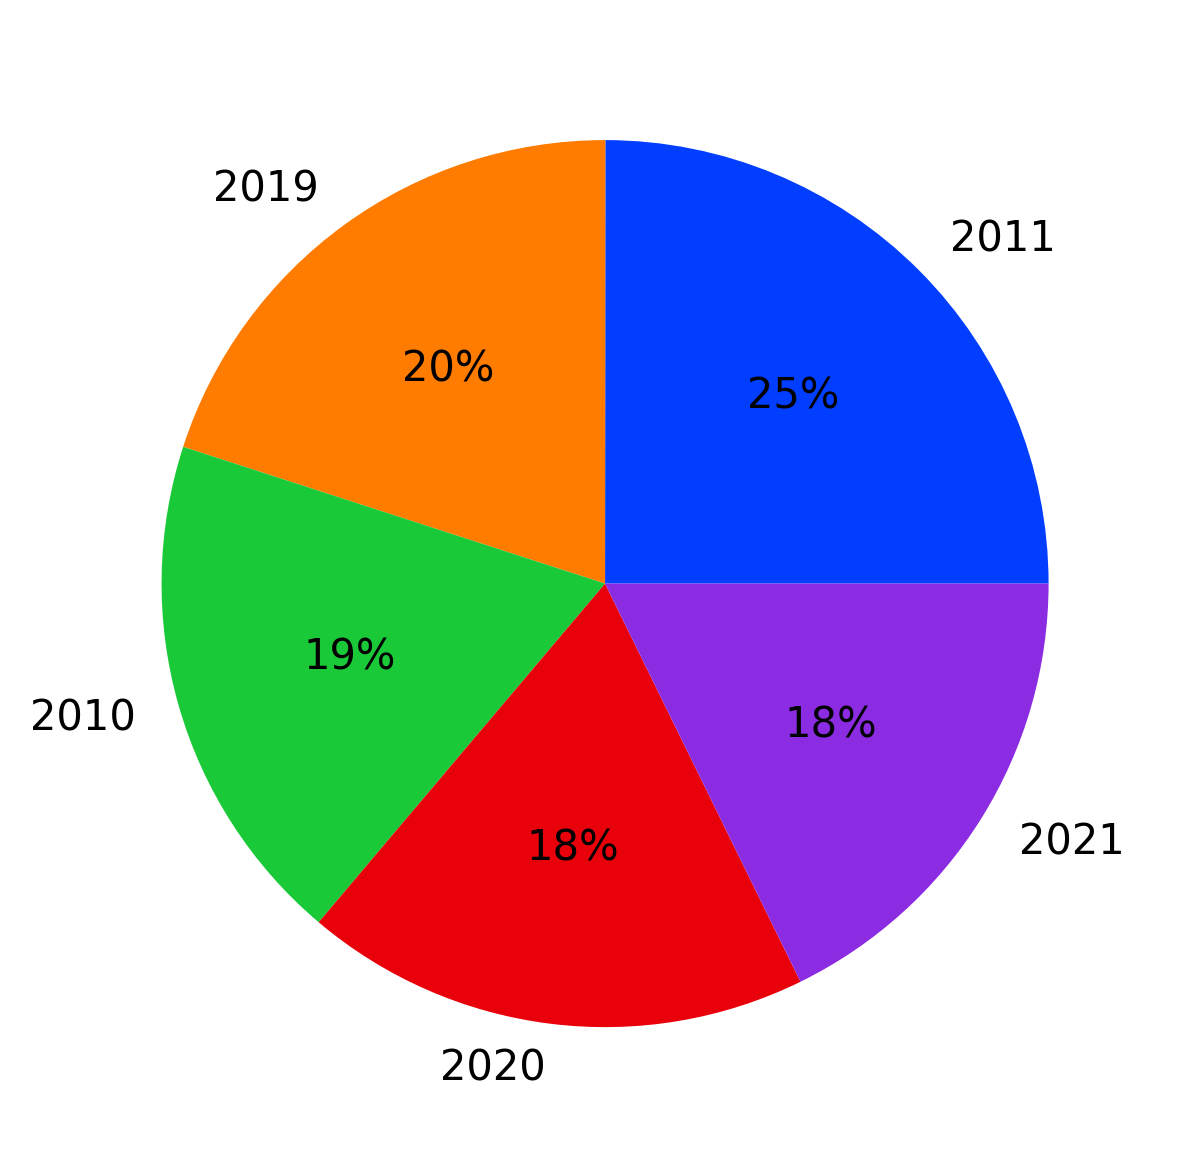

In [15]:
#撤稿数量最多的5年统计
plt.figure(dpi=300)
data_2 = list(pd.value_counts(df['Publication Year']))
y2 = data_2[:5]
index_name2 = list(pd.value_counts(df['Publication Year']).index)
x2 = index_name2[:5]

colors = sns.color_palette("bright")
pic = plt.pie(x=y2, labels=x2, colors=colors, autopct="%0.0f%%")
plt.show()

C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\1921153582.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  my_plot1 = sns.barplot(x=x3,y=y3,palette="Set1", ci=95,
C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\1921153582.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  my_plot1 = sns.barplot(x=x3,y=y3,palette="Set1", ci=95,
C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\1921153582.py:9: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  my_plot1 = sns.barplot(x=x3,y=y3,palette="Set1", ci=95,
C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\1921153582.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot1.set_xticklabels(my_plot1.get_xticklabels(),rotation=45)


[Text(0, 0, '2023'),
 Text(1, 0, '2022'),
 Text(2, 0, '2021'),
 Text(3, 0, '2020'),
 Text(4, 0, '2019'),
 Text(5, 0, '2018'),
 Text(6, 0, '2017'),
 Text(7, 0, '2016'),
 Text(8, 0, '2015'),
 Text(9, 0, '2014')]

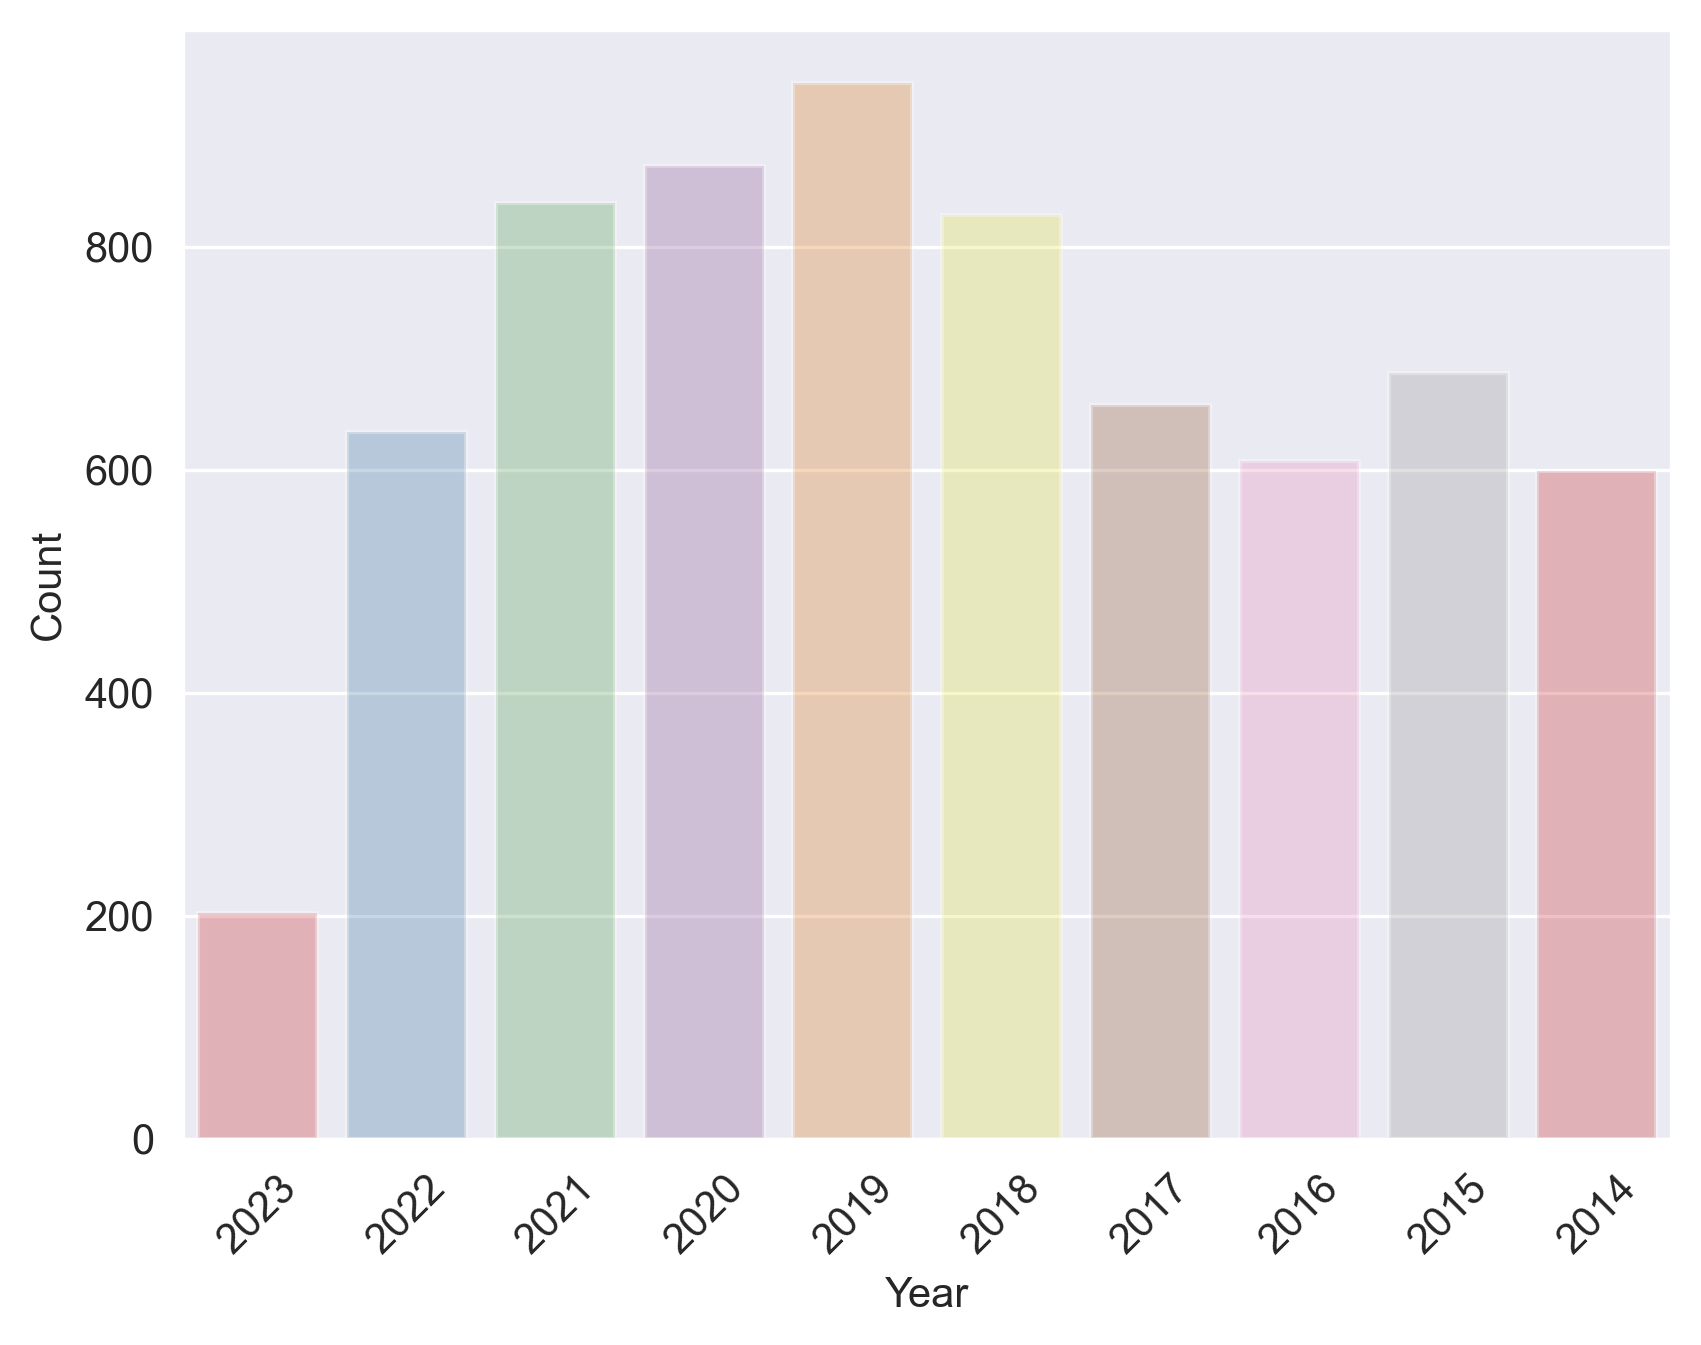

In [16]:
#近十年撤稿数据统计
data_3 = pd.Series(Year_count)
data_3 = pd.Series(data_3.sort_index(ascending=False))
y3 = list(data_3.values)[:10]
x3 = list(data_3.index)[:10]

plt.figure(dpi=300)
sns.set_style('darkgrid')
my_plot1 = sns.barplot(x=x3,y=y3,palette="Set1", ci=95,
            errwidth=2, alpha=0.3)
colors = sns.color_palette("bright")
plt.xlabel('Year')
plt.ylabel('Count')
my_plot1.set_xticklabels(my_plot1.get_xticklabels(),rotation=45)
# plt.savefig('graph.svg')

C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\2804829168.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot4.set_xticklabels(my_plot4.get_xticklabels(),rotation=90)


[Text(0, 0, '2023'),
 Text(1, 0, '2022'),
 Text(2, 0, '2021'),
 Text(3, 0, '2020'),
 Text(4, 0, '2019'),
 Text(5, 0, '2018'),
 Text(6, 0, '2017'),
 Text(7, 0, '2016'),
 Text(8, 0, '2015'),
 Text(9, 0, '2014'),
 Text(10, 0, '2013'),
 Text(11, 0, '2012'),
 Text(12, 0, '2011'),
 Text(13, 0, '2010'),
 Text(14, 0, '2009'),
 Text(15, 0, '2008'),
 Text(16, 0, '2007'),
 Text(17, 0, '2006'),
 Text(18, 0, '2005'),
 Text(19, 0, '2004'),
 Text(20, 0, '2003'),
 Text(21, 0, '2002'),
 Text(22, 0, '2001'),
 Text(23, 0, '2000')]

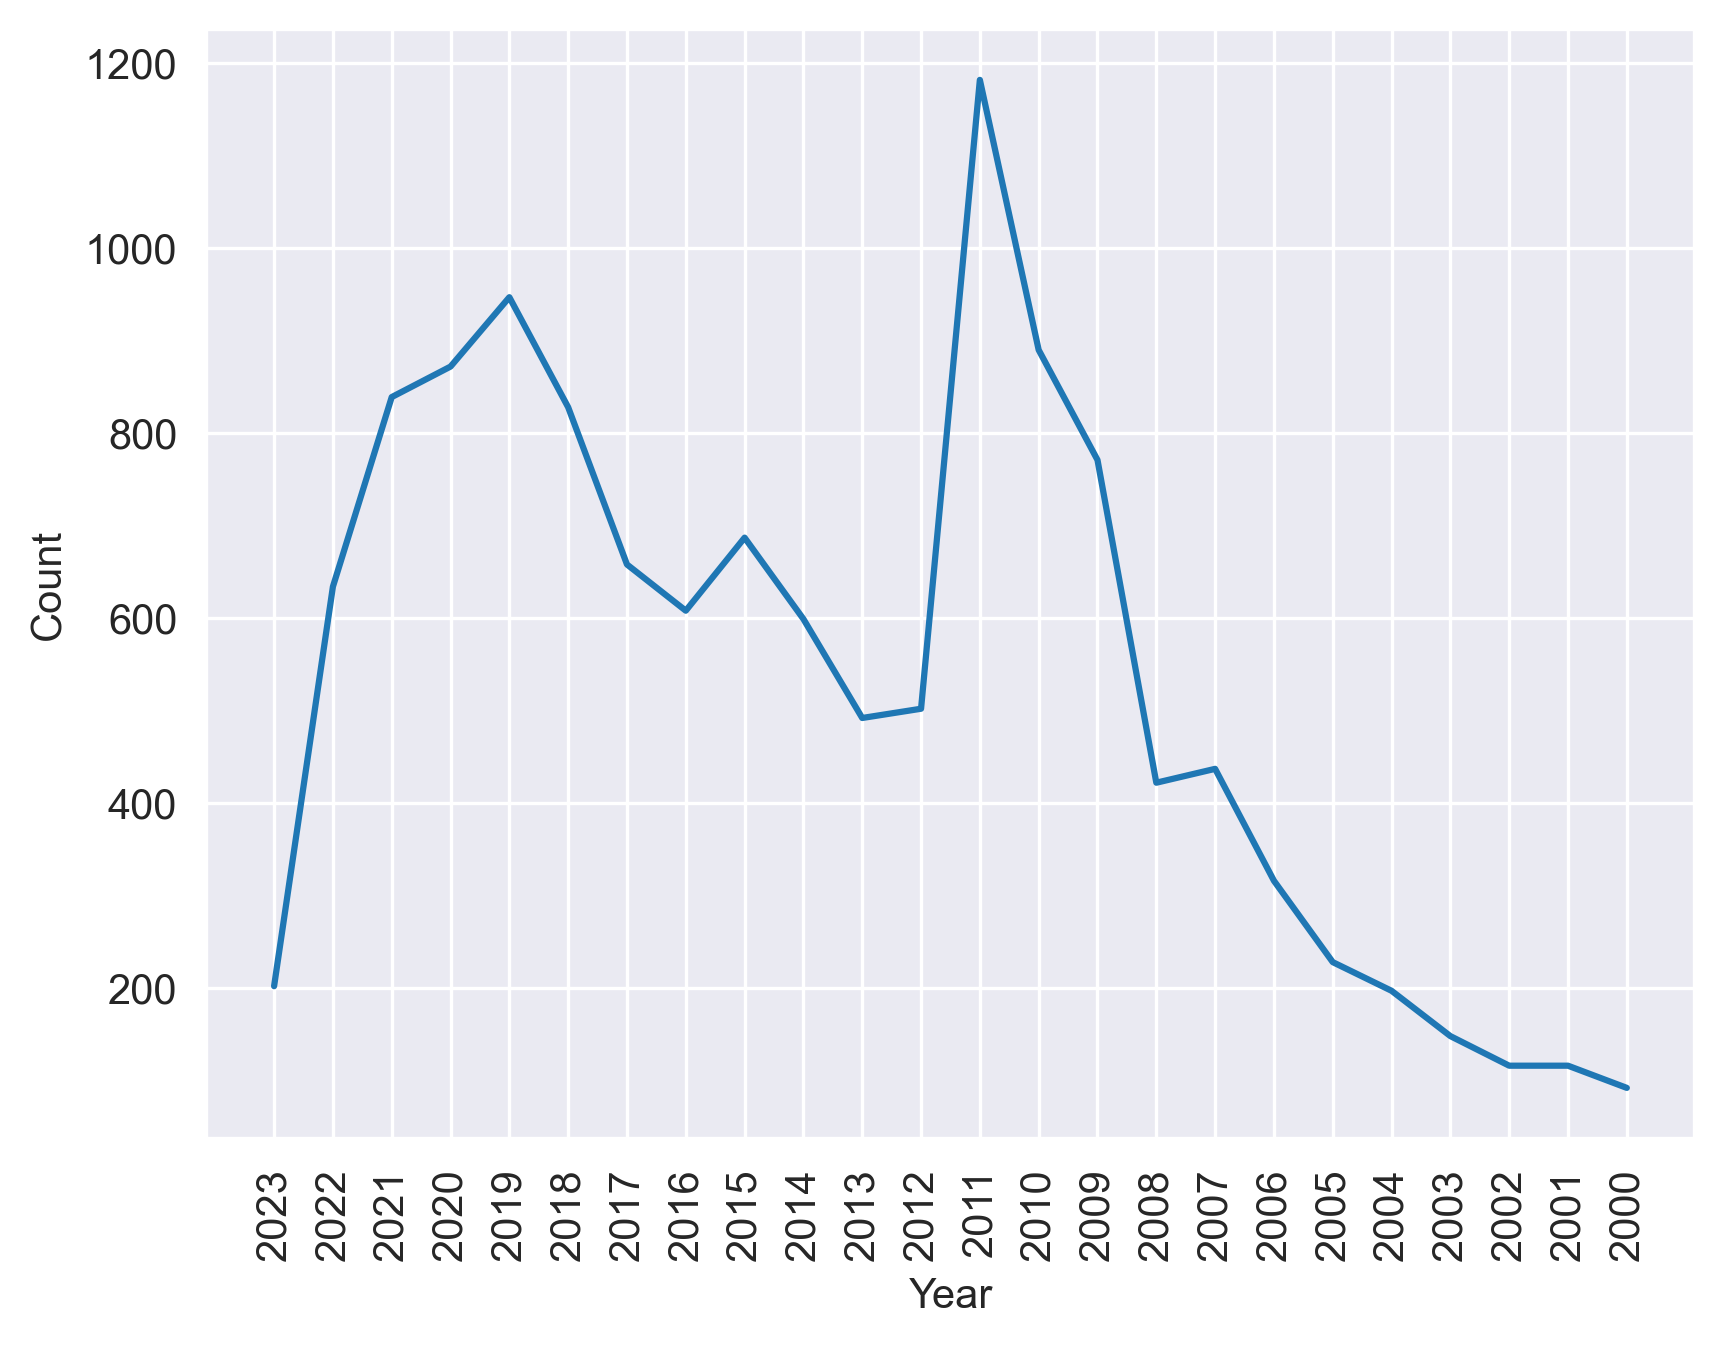

In [17]:
#Wos数据库21世纪后撤稿论文趋势统计
data_4 = pd.Series(Year_count)
data_4 = pd.Series(data_4.sort_index(ascending=False))
y4 = list(data_4.values)[0:24]
x4 = list(data_4.index)[0:24]

plt.figure(dpi=300)
my_plot4 = sns.lineplot(x=x4,y=y4)
plt.xlabel('Year')
plt.ylabel('Count')
my_plot4.set_xticklabels(my_plot4.get_xticklabels(),rotation=90)

撤稿文献研究领域分布

In [18]:
pd.value_counts(df['Research Areas'])

Oncology                                                     806
Energy & Fuels; Environmental Sciences & Ecology             760
Computer Science; Engineering                                557
Chemistry                                                    529
Science & Technology - Other Topics                          458
                                                            ... 
Biophysics; Engineering; Hematology                            1
Chemistry; Toxicology                                          1
Evolutionary Biology; Genetics & Heredity                      1
Remote Sensing; Imaging Science & Photographic Technology      1
Agriculture; Food Science & Technology                         1
Name: Research Areas, Length: 809, dtype: int64

C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\1908832133.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  my_plot = sns.barplot(x=y4,y=x4,palette="RdYlGn", ci=95,
C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\1908832133.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  my_plot = sns.barplot(x=y4,y=x4,palette="RdYlGn", ci=95,
C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\1908832133.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  my_plot = sns.barplot(x=y4,y=x4,palette="RdYlGn", ci=95,
C:\Users\yhy\AppData\Local\Temp\ipykernel_20764\1908832133.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(),rotation=90)


[Text(0.0, 0, '0'),
 Text(100.0, 0, '100'),
 Text(200.0, 0, '200'),
 Text(300.0, 0, '300'),
 Text(400.0, 0, '400'),
 Text(500.0, 0, '500'),
 Text(600.0, 0, '600'),
 Text(700.0, 0, '700'),
 Text(800.0, 0, '800'),
 Text(900.0, 0, '900')]

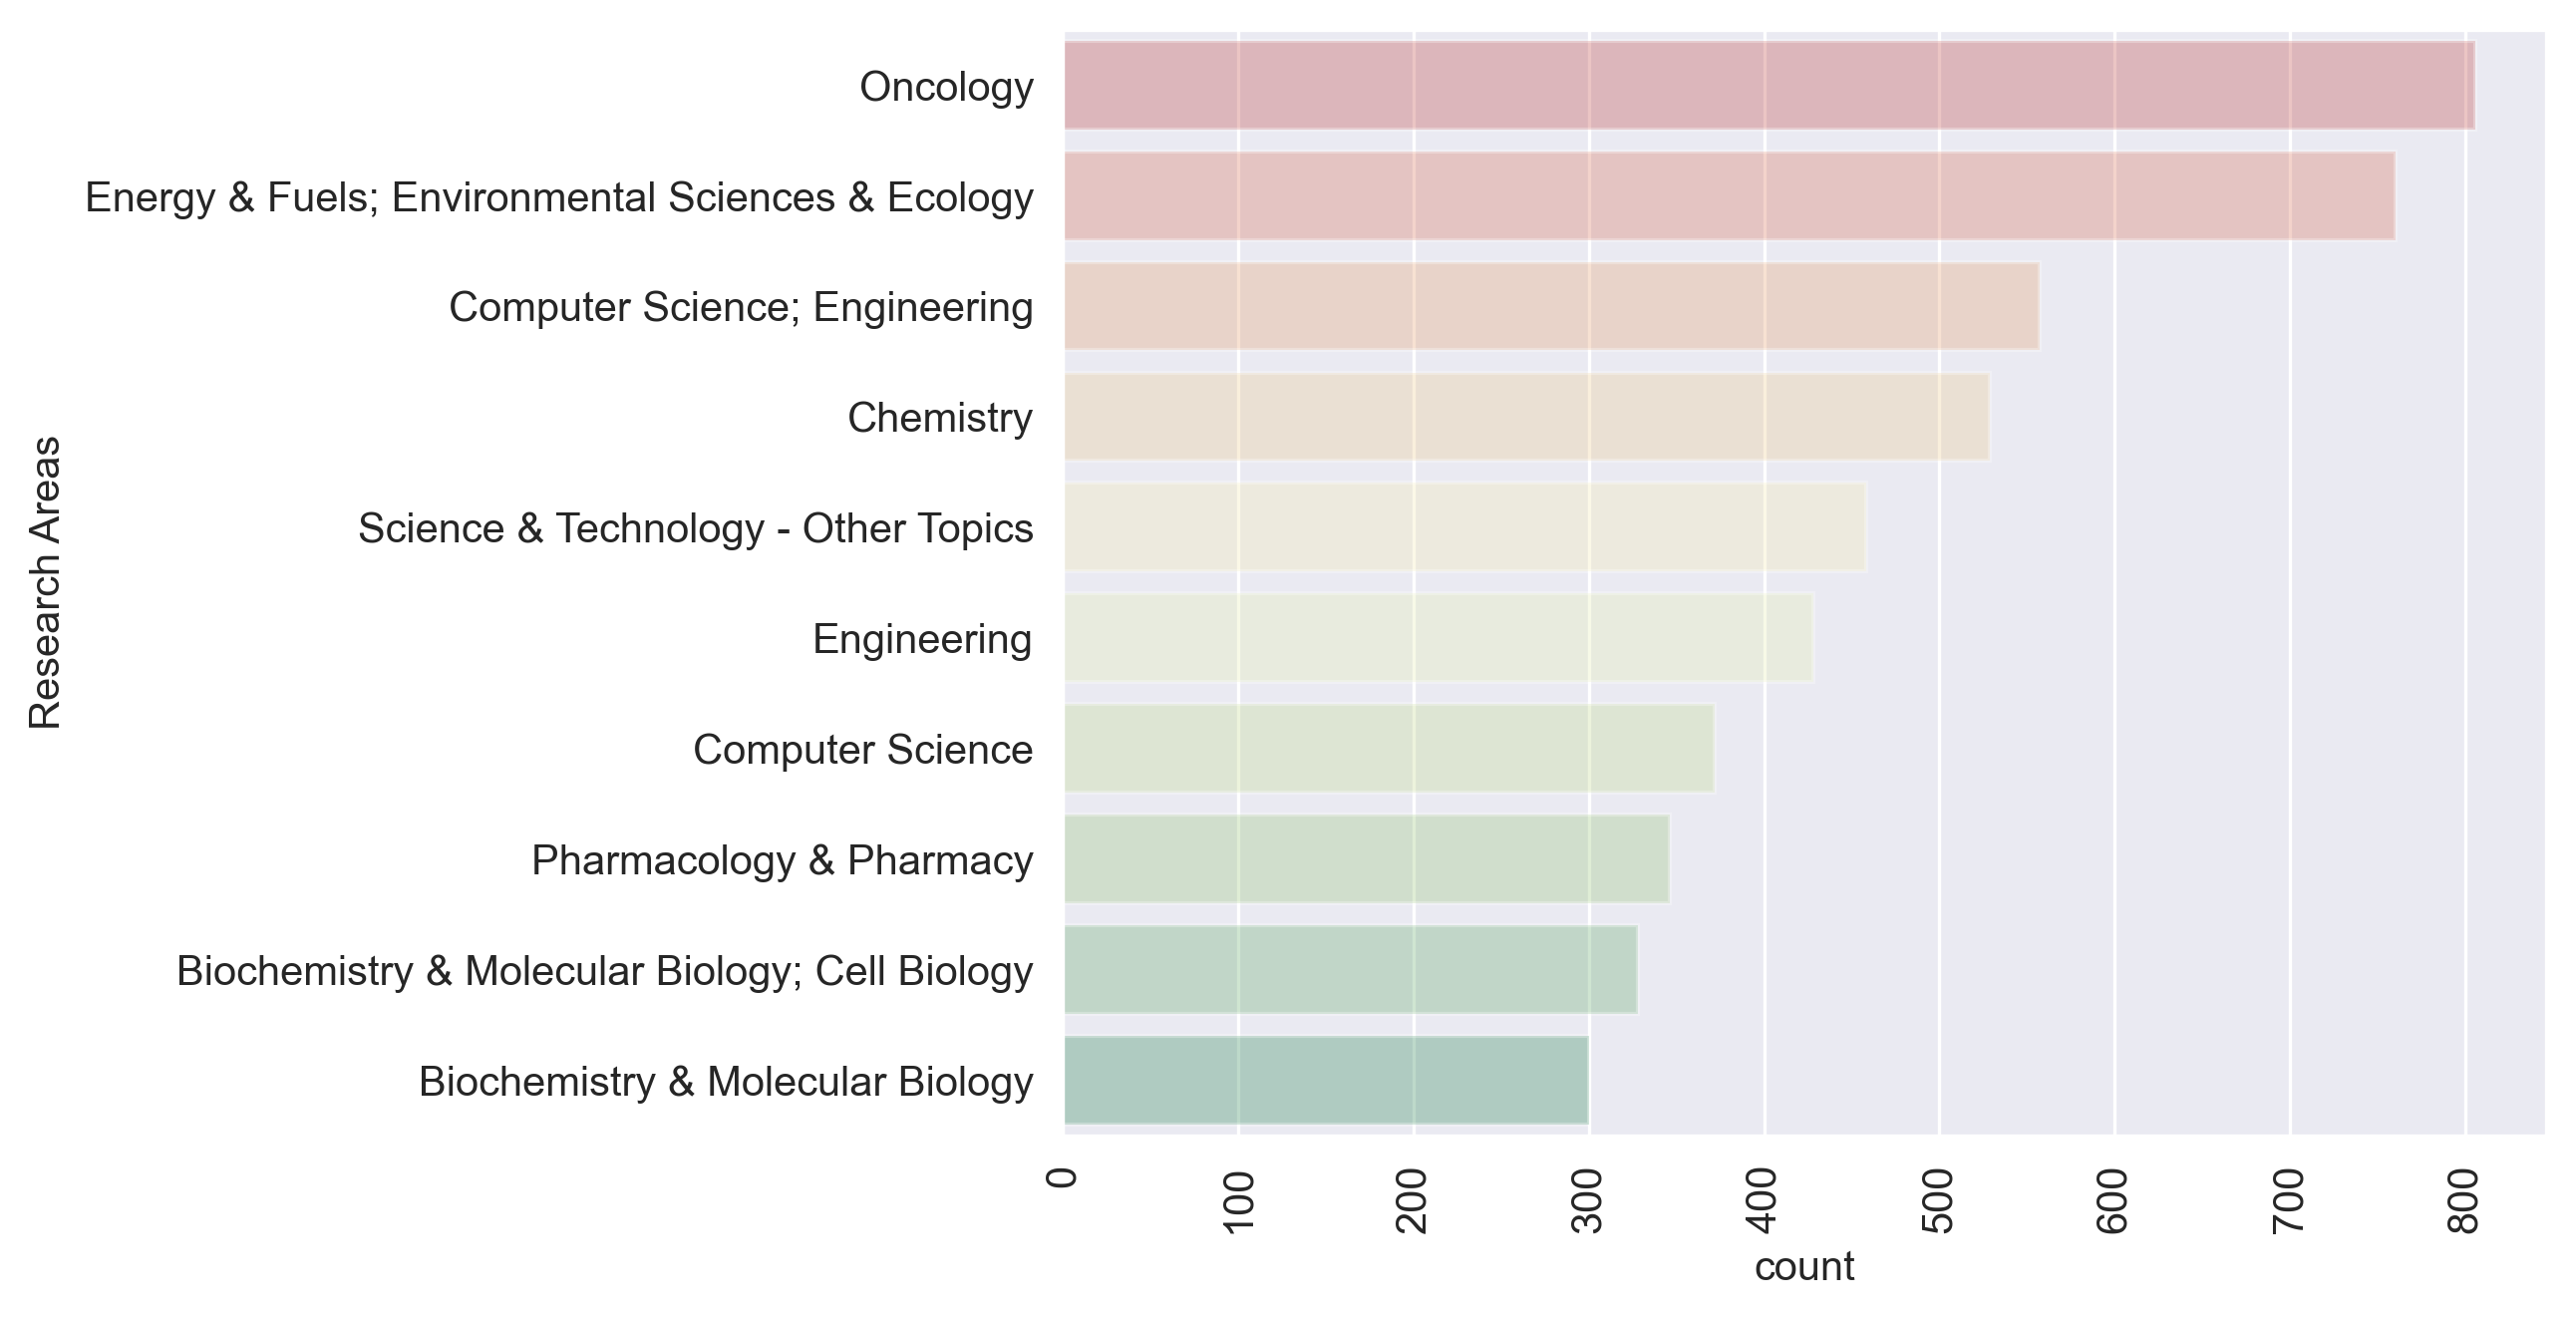

In [19]:
#撤稿研究领域前十名统计
data_4 = list(pd.value_counts(df['Research Areas']))
y4 = data_4[:10]
index_name4 = list(pd.value_counts(df['Research Areas']).index)
x4 = index_name4[:10]

plt.figure(dpi=300)
my_plot = sns.barplot(x=y4,y=x4,palette="RdYlGn", ci=95,
            errwidth=2, alpha=0.3)
plt.xlabel('count')
plt.ylabel('Research Areas')
my_plot.set_xticklabels(my_plot.get_xticklabels(),rotation=90)

In [4]:
data_5 = df['Author Keywords']
data_5 = list(data_5)
for i in data_5:
    if i is None:
        data_5.remove(i)


WoS数据库撤稿隶属关系统计

C:\Users\yhy\AppData\Local\Temp\ipykernel_9628\1973652656.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  my_plot = sns.barplot(x=y6,y=x6,palette="pink", ci=95,
C:\Users\yhy\AppData\Local\Temp\ipykernel_9628\1973652656.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  my_plot = sns.barplot(x=y6,y=x6,palette="pink", ci=95,
C:\Users\yhy\AppData\Local\Temp\ipykernel_9628\1973652656.py:12: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  my_plot = sns.barplot(x=y6,y=x6,palette="pink", ci=95,
C:\Users\yhy\AppData\Local\Temp\ipykernel_9628\1973652656.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(),rotation=90)


[Text(0.0, 0, '0'),
 Text(10.0, 0, '10'),
 Text(20.0, 0, '20'),
 Text(30.0, 0, '30'),
 Text(40.0, 0, '40'),
 Text(50.0, 0, '50'),
 Text(60.0, 0, '60'),
 Text(70.0, 0, '70'),
 Text(80.0, 0, '80'),
 Text(90.0, 0, '90')]

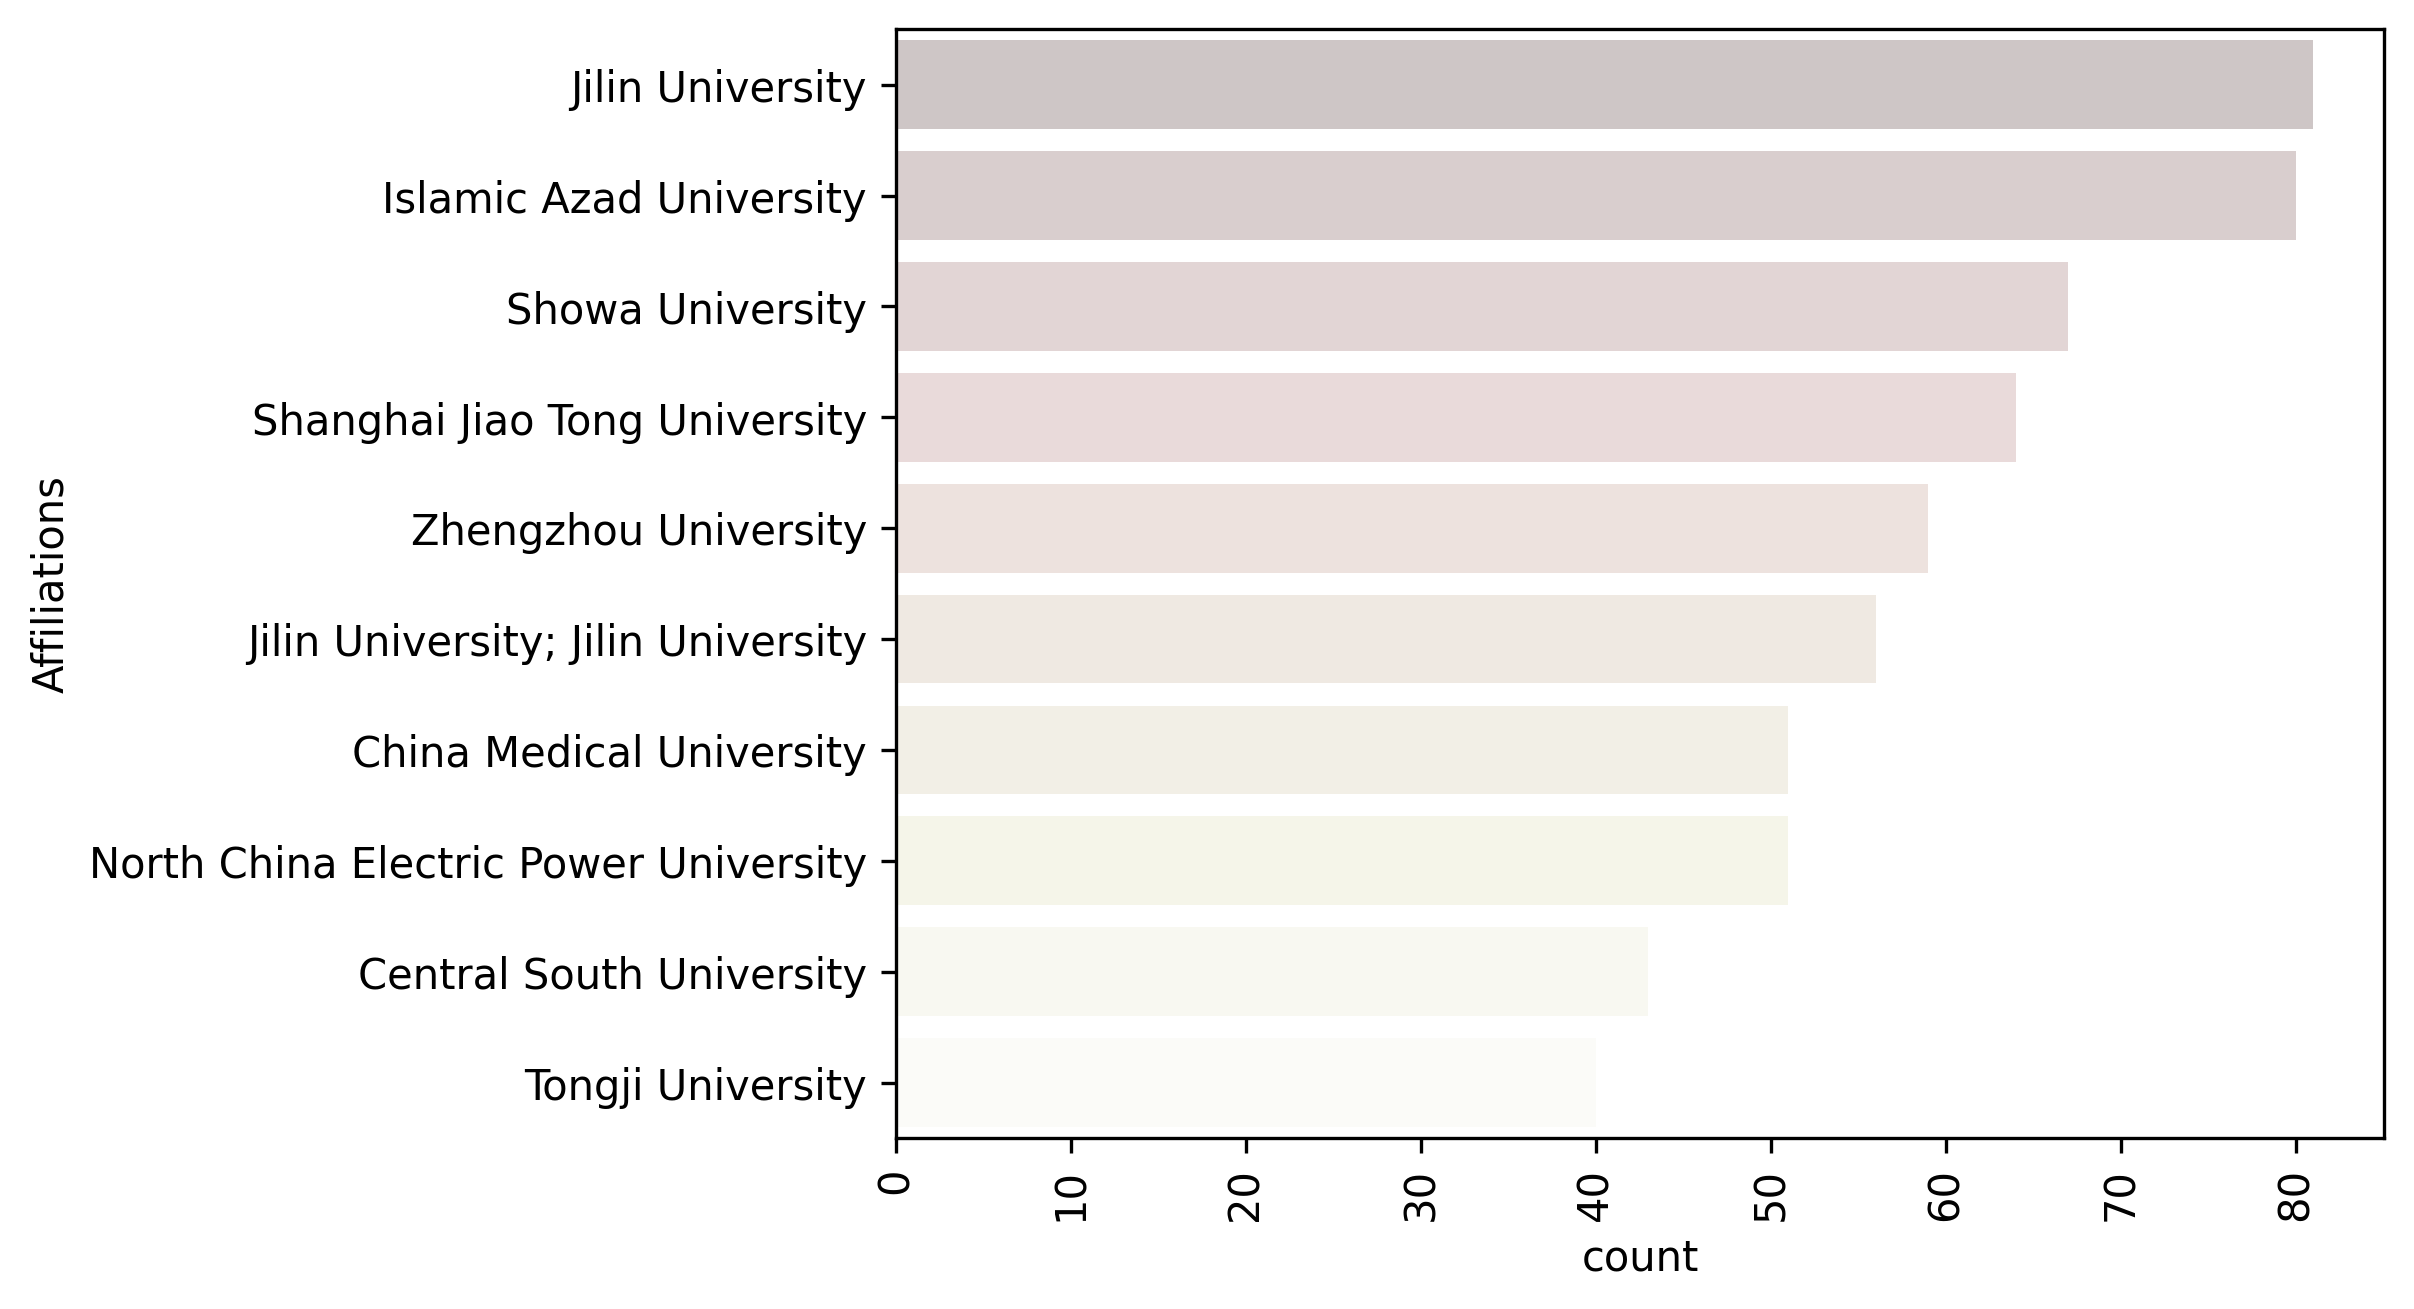

In [10]:
data_6 = df['Affiliations']
data_6 = list(data_6)
for i in data_6:
    if i is None:
        data_6.remove(i)
data_6 = pd.value_counts(data_6)[:10]
x6 = list(data_6.index)
y6 = list(data_6.values)


plt.figure(dpi=300)
my_plot = sns.barplot(x=y6,y=x6,palette="pink", ci=95,
            errwidth=2, alpha=0.3)
plt.xlabel('count')
plt.ylabel('Affiliations')
my_plot.set_xticklabels(my_plot.get_xticklabels(),rotation=90)